# Importe modules

In [2]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *

# Plotting modules 
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns

# Read amip-piForcing : radiative budget, tas

## First model : CNRM-CM6-1

In [31]:
#------------- CNRM_amip : open files and read variables ----------------------
#
path_amip = "/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/"
filename_amipCTL = "*_amip-piForcing_*.nc"
file_amipCTL = xr.open_mfdataset(path_amip+filename_amipCTL,combine='by_coords')
#
variables=['rlut', 'rsut','rsdt','tas']
df_amipCTL=file_amipCTL[variables].to_dataframe().drop('height',axis=1)
df1_amipCTL=df_amipCTL.reset_index(level=['time'])
df1_amipCTL['year']=pd.DatetimeIndex(df1_amipCTL['time']).year
amip_CTL=df1_amipCTL.groupby(['year']).mean()
#amip_CTL

In [32]:
# Compute radiative budget 
amip_CTL['F']=amip_CTL['rsdt']
amip_CTL['H']=amip_CTL['rsut']+amip_CTL['rlut']
amip_CTL['N']=amip_CTL['F']-amip_CTL['H']

# reshape
year_list=range(1870,1960,1)
yrlist=range(1990,2015,1)
amipCTL=amip_CTL.drop(year_list).drop(yrlist).reset_index(level=['year']).drop(axis=1,columns='year')
#amipCTL

In [33]:
#------------- CNRM_SST : open files and read variables ----------------------
#
path_sst = "/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/SST/"
filename_sstCTL = "*_piSST_*.nc"
file_sstCTL = xr.open_mfdataset(path_sst+filename_sstCTL,combine='by_coords')
#
variables=['rlut', 'rsut','rsdt','tas']
df_sstCTL=file_sstCTL[variables].to_dataframe().drop('height',axis=1)
df1_sstCTL=df_sstCTL.reset_index(level=['time'])
df1_sstCTL['year']=pd.DatetimeIndex(df1_sstCTL['time']).year
sst_CTL=df1_sstCTL.groupby(['year']).mean()
#sst_CTL

In [34]:
# Compute radiative budget 
sst_CTL['F']=sst_CTL['rsdt']
sst_CTL['H']=sst_CTL['rsut']+sst_CTL['rlut']
sst_CTL['N']=sst_CTL['F']-sst_CTL['H']

# reshape
sstCTL=sst_CTL.reset_index(level=['year']).drop(axis=1,columns='year')
#sstCTL

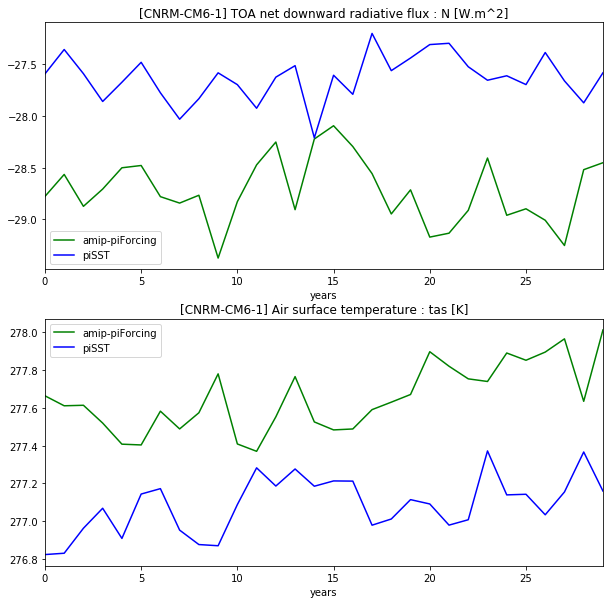

In [7]:
# Create plot of radiative budget
plt.subplot(211)
ax=plt.gca()
amipCTL.plot(y='N',kind='line',title='[CNRM-CM6-1] TOA net downward radiative flux : N [W.m^2]',legend=True, color='green',figsize=(10,10),ax=ax)
sstCTL.plot(y='N',kind='line',legend=True, color='blue',ax=ax)
plt.xlabel('years')
ax.legend(['amip-piForcing','piSST'])
#
# tas
plt.subplot(212)
ax1=plt.gca()
amipCTL.plot(y='tas',kind='line',title='[CNRM-CM6-1] Air surface temperature : tas [K]',legend=True, color='green',figsize=(10,10),ax=ax1)
sstCTL.plot(y='tas',kind='line',legend=True, color='blue',ax=ax1)
plt.xlabel('years')
ax1.legend(['amip-piForcing','piSST'])

# Read amip-p4xCO2 : radiative budget, tas

In [35]:
#------------- CNRM_amip : open files and read variables ----------------------
#
filename_amip4xCO2 = "*_amip-4xCO2_*.nc"
file_amip4xCO2 = xr.open_mfdataset(path_amip+filename_amip4xCO2,combine='by_coords')
#
variables=['rlut', 'rsut','rsdt','tas']
df_amip4xCO2=file_amip4xCO2[variables].to_dataframe().drop('height',axis=1)
df1_amip4xCO2=df_amip4xCO2.reset_index(level=['time'])
df1_amip4xCO2['year']=pd.DatetimeIndex(df1_amip4xCO2['time']).year
amip_4xCO2=df1_amip4xCO2.groupby(['year']).mean()
#amip_4xCO2

In [36]:
# Compute radiative budget 
amip_4xCO2['F']=amip_4xCO2['rsdt']
amip_4xCO2['H']=amip_4xCO2['rsut']+amip_4xCO2['rlut']
amip_4xCO2['N']=amip_4xCO2['F']-amip_4xCO2['H']

# reshape
year_list=range(2008,2014,1)
amip4xCO2=amip_4xCO2.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
#amip4xCO2

# Read piSST-p4xCO2 : radiative budget, tas

In [37]:
#------------- CNRM_SST : open files and read variables ----------------------
#
filename_sst4xCO2 = "*_piSST-4xCO2_*.nc"
file_sst4xCO2 = xr.open_mfdataset(path_sst+filename_sst4xCO2,combine='by_coords')
#
df_sst4xCO2=file_sst4xCO2[variables].to_dataframe().drop('height',axis=1)
df1_sst4xCO2=df_sst4xCO2.reset_index(level=['time'])
df1_sst4xCO2['year']=pd.DatetimeIndex(df1_sst4xCO2['time']).year
sst_4xCO2=df1_sst4xCO2.groupby(['year']).mean()
#sst_4xCO2

In [38]:
# Compute radiative budget 
sst_4xCO2['F']=sst_4xCO2['rsdt']
sst_4xCO2['H']=sst_4xCO2['rsut']+sst_4xCO2['rlut']
sst_4xCO2['N']=sst_4xCO2['F']-sst_4xCO2['H']
sst4xCO2=sst_4xCO2.reset_index(level=['year']).drop(axis=1,columns='year')
#sst4xCO2

# Create plot

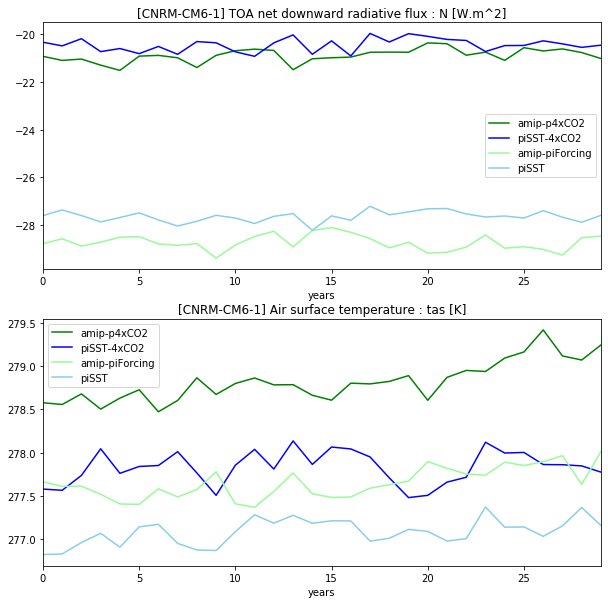

In [27]:
# Create plot of radiative budget
plt.subplot(211)
ax=plt.gca()
amip4xCO2.plot(y='N',kind='line',title='[CNRM-CM6-1] TOA net downward radiative flux : N [W.m^2]',legend=True, color='green',figsize=(10,10),ax=ax)
sst4xCO2.plot(y='N',kind='line',legend=True, color='blue',ax=ax)
amipCTL.plot(y='N',kind='line',legend=True, color='palegreen',figsize=(10,10),ax=ax)
sstCTL.plot(y='N',kind='line',legend=True, color='skyblue',ax=ax)
plt.xlabel('years')
ax.legend(['amip-p4xCO2','piSST-4xCO2','amip-piForcing','piSST'])
#
# tas
plt.subplot(212)
ax1=plt.gca()
amip4xCO2.plot(y='tas',kind='line',title='[CNRM-CM6-1] Air surface temperature : tas [K]',legend=True, color='green',figsize=(10,10),ax=ax1)
sst4xCO2.plot(y='tas',kind='line',legend=True, color='blue',ax=ax1)
amipCTL.plot(y='tas',kind='line',legend=True, color='palegreen',figsize=(10,10),ax=ax1)
sstCTL.plot(y='tas',kind='line',legend=True, color='skyblue',ax=ax1)
plt.xlabel('years')
ax1.legend(['amip-p4xCO2','piSST-4xCO2','amip-piForcing','piSST'])

# Read amip-p4K : radiative budget, tas

In [39]:
#------------- CNRM_amip-p4K : open files and read variables ----------------------
#
filename_amip4K = "*_amip-p4K_*.nc"
file_amip4K = xr.open_mfdataset(path_amip+filename_amip4K,combine='by_coords')
#
df_amip4K=file_amip4K[variables].to_dataframe().drop('height',axis=1)
df1_amip4K=df_amip4K.reset_index(level=['time'])
df1_amip4K['year']=pd.DatetimeIndex(df1_amip4K['time']).year
amip_p4K=df1_amip4K.groupby(['year']).mean()
#amip_p4K

In [40]:
# Compute radiative budget 
amip_p4K['F']=amip_p4K['rsdt']
amip_p4K['H']=amip_p4K['rsut']+amip_p4K['rlut']
amip_p4K['N']=amip_p4K['F']-amip_p4K['H']

# reshape
year_list=range(2008,2014,1)
amip4K=amip_p4K.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
#amip4K

# Read amip-future4K : radiative budget, tas

In [43]:
#------------- CNRM_amip-future4K : open files and read variables ----------------------
#
filename_amipfuture4K = "*_amip-future4K_*.nc"
file_amipfuture4K = xr.open_mfdataset(path_amip+filename_amipfuture4K,combine='by_coords')
#
df_amipfuture4K=file_amipfuture4K[variables].to_dataframe().drop('height',axis=1)
df1_amipfuture4K=df_amipfuture4K.reset_index(level=['time'])
df1_amipfuture4K['year']=pd.DatetimeIndex(df1_amipfuture4K['time']).year
amip_future4K=df1_amipfuture4K.groupby(['year']).mean()
#amip_future4K

In [44]:
# Compute radiative budget 
amip_future4K['F']=amip_future4K['rsdt']
amip_future4K['H']=amip_future4K['rsut']+amip_future4K['rlut']
amip_future4K['N']=amip_future4K['F']-amip_future4K['H']

# reshape
year_list=range(2008,2014,1)
amipfuture4K=amip_future4K.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
#amipfuture4K

# Create plot

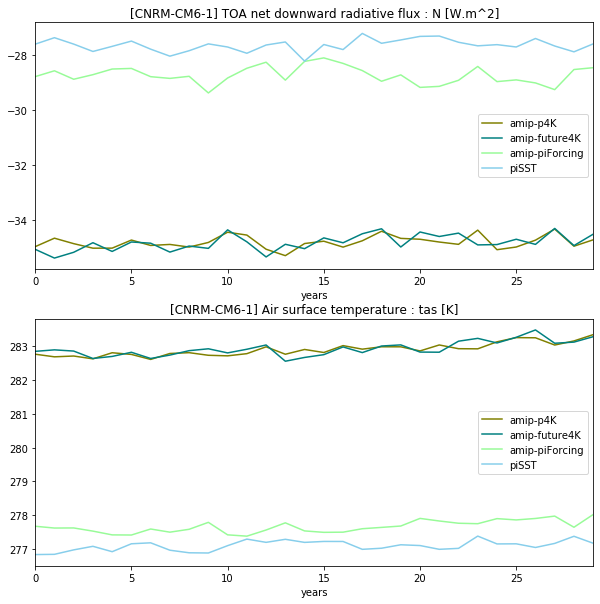

In [45]:
# Create plot of radiative budget
plt.subplot(211)
ax=plt.gca()
amip4K.plot(y='N',kind='line',title='[CNRM-CM6-1] TOA net downward radiative flux : N [W.m^2]',legend=True, color='olive',figsize=(10,10),ax=ax)
amipfuture4K.plot(y='N',kind='line',legend=True, color='teal',ax=ax)
amipCTL.plot(y='N',kind='line',legend=True, color='palegreen',figsize=(10,10),ax=ax)
sstCTL.plot(y='N',kind='line',legend=True, color='skyblue',ax=ax)
plt.xlabel('years')
ax.legend(['amip-p4K','amip-future4K','amip-piForcing','piSST'])
#
# tas
plt.subplot(212)
ax1=plt.gca()
amip4K.plot(y='tas',kind='line',title='[CNRM-CM6-1] Air surface temperature : tas [K]',legend=True, color='olive',figsize=(10,10),ax=ax1)
amipfuture4K.plot(y='tas',kind='line',legend=True, color='teal',ax=ax1)
amipCTL.plot(y='tas',kind='line',legend=True, color='palegreen',figsize=(10,10),ax=ax1)
sstCTL.plot(y='tas',kind='line',legend=True, color='skyblue',ax=ax1)
plt.xlabel('years')
ax1.legend(['amip-p4K','amip-future4K','amip-piForcing','piSST'])

# Compute : Delta(TOA), Delta(tas), Lambda

In [77]:
result= pd.DataFrame()

i=1
N=len(amip4xCO2)

Lbda_amip=[]
Lbda_sst=[]
Lbda_amip4K=[]
Lbda_amipfuture4K=[]

DN_amip=[]
DN_sst=[]
DN_amip4K=[]
DN_amipfuture4K=[]

Dtas_amip=[]
Dtas_sst=[]
Dtas_amip4K=[]
Dtas_amipfuture4K=[]

while i<N:
    
    amipCTL_tmp=amipCTL.iloc[0:i,:]
    
    amip4xCO2_tmp=amip4xCO2.iloc[0:i,:]
    Delta_N_amip=(amip4xCO2_tmp['N']-amipCTL_tmp['N']).mean()
    Delta_tas_amip=(amip4xCO2_tmp['tas']-amipCTL_tmp['tas']).mean()
    Lambda_amip=Delta_N_amip/Delta_tas_amip
    Lbda_amip.append(Lambda_amip)
    DN_amip.append(Delta_N_amip)
    Dtas_amip.append(Delta_tas_amip)
    
    amip4K_tmp=amip4K.iloc[0:i,:]
    Delta_N_amip4K=amip4K_tmp['N'].mean()-amipCTL_tmp['N'].mean()
    Delta_tas_amip4K=amip4K_tmp['tas'].mean()-amipCTL_tmp['tas'].mean()
    Lambda_amip4K=Delta_N_amip4K/Delta_tas_amip4K
    Lbda_amip4K.append(Lambda_amip4K)
    DN_amip4K.append(Delta_N_amip4K)
    Dtas_amip4K.append(Delta_tas_amip4K)    
    
    amipfuture4K_tmp=amipfuture4K.iloc[0:i,:]
    Delta_N_amipfuture4K=amipfuture4K_tmp['N'].mean()-amipCTL_tmp['N'].mean()
    Delta_tas_amipfuture4K=amipfuture4K_tmp['tas'].mean()-amipCTL_tmp['tas'].mean()
    Lambda_amipfuture4K=Delta_N_amipfuture4K/Delta_tas_amipfuture4K
    Lbda_amipfuture4K.append(Lambda_amipfuture4K)
    DN_amipfuture4K.append(Delta_N_amipfuture4K)
    Dtas_amipfuture4K.append(Delta_tas_amipfuture4K)   
    
    sstCTL_tmp=sstCTL.iloc[0:i,:]
    sst4xCO2_tmp=sst4xCO2.iloc[0:i,:]
    Delta_N_sst=sst4xCO2_tmp['N'].mean()-sstCTL_tmp['N'].mean()
    Delta_tas_sst=sst4xCO2_tmp['tas'].mean()-sstCTL_tmp['tas'].mean()
    Lambda_sst=Delta_N_sst/Delta_tas_sst
    Lbda_sst.append(Lambda_sst)
    DN_sst.append(Delta_N_sst)
    Dtas_sst.append(Delta_tas_sst)
    
    i=i+1
 
result['Delta_N_amip4xCO2']=DN_amip
result['Delta_tas_amip4xCO2']=Dtas_amip
result['Lambda_amip4xCO2']=Lbda_amip

result['Delta_N_amip4K']=DN_amip4K
result['Delta_tas_amip4K']=Dtas_amip4K
result['Lambda_amip4K']=Lbda_amip4K

result['Delta_N_amipfuture4K']=DN_amipfuture4K
result['Delta_tas_amipfuture4K']=Dtas_amipfuture4K
result['Lambda_amipfuture4K']=Lbda_amipfuture4K

result['Delta_N_sst']=DN_sst
result['Delta_tas_sst']=Dtas_sst
result['Lambda_sst']=Lbda_sst

result

,Delta_N_amip4xCO2,Delta_tas_amip4xCO2,Lambda_amip4xCO2,Delta_N_amip4K,Delta_tas_amip4K,Lambda_amip4K,Delta_N_amipfuture4K,Delta_tas_amipfuture4K,Lambda_amipfuture4K,Delta_N_sst,Delta_tas_sst,Lambda_sst
0,7.851685,0.912720,8.602514,-6.200195,5.105713,-1.214364,-6.297760,5.190460,-1.213334,7.258270,0.756134,9.599185
1,7.660431,0.928940,8.246423,-6.152054,5.093384,-1.207852,-6.563232,5.239166,-1.252725,7.064407,0.745544,9.475501
2,7.717947,0.974243,7.921992,-6.099751,5.096283,-1.196902,-6.478912,5.242523,-1.235839,7.177723,0.755249,9.503783
3,7.641434,0.976578,7.824706,-6.156639,5.100311,-1.207110,-6.391113,5.212708,-1.226064,7.166069,0.810486,8.841696
4,7.510547,1.025708,7.322305,-6.231560,5.161285,-1.207366,-6.443165,5.229370,-1.232111,7.147955,0.818878,8.728960
5,7.519007,1.075160,6.993387,-6.236080,5.194305,-1.200561,-6.424107,5.261688,-1.220921,7.068192,0.798523,8.851583
6,7.572610,1.048680,7.221088,-6.224401,5.171173,-1.203673,-6.373827,5.232971,-1.218013,7.096235,0.781494,9.080343
7,7.608036,1.056873,7.198626,-6.203243,5.187622,-1.195778,-6.368870,5.235748,-1.216420,7.108017,0.816162,8.709075
8,7.581652,1.082825,7.001735,-6.205851,5.193573,-1.194910,-6.348944,5.242981,-1.210942,7.154505,0.824280,8.679705
9,7.672440,1.063782,7.212419,-6.130432,5.170013,-1.185767,-6.280781,5.233734,-1.200057,7.161434,0.805573,8.889869


In [65]:
# Lambda mean : 

L_amip=Lbda_amip[10:28]
Lamip=mean(L_amip)
#Lamip

L_sst=Lbda_sst[10:28]
Lsst=mean(L_sst)
#Lsst

L_amip4K=Lbda_amip4K[10:28]
Lamip4K=mean(L_amip4K)
#Lamip4K

L_amipfuture4K=Lbda_amipfuture4K[10:28]
Lamipfuture4K=mean(L_amipfuture4K)
Lamipfuture4K


-1.1831332

# Create plots

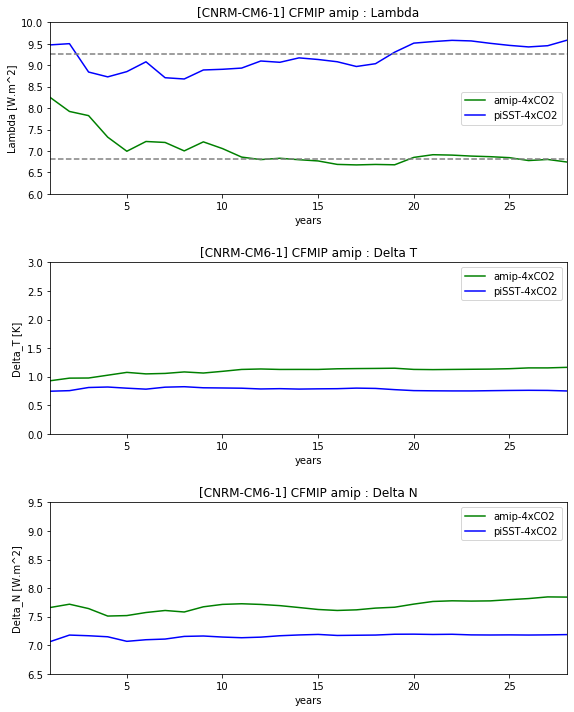

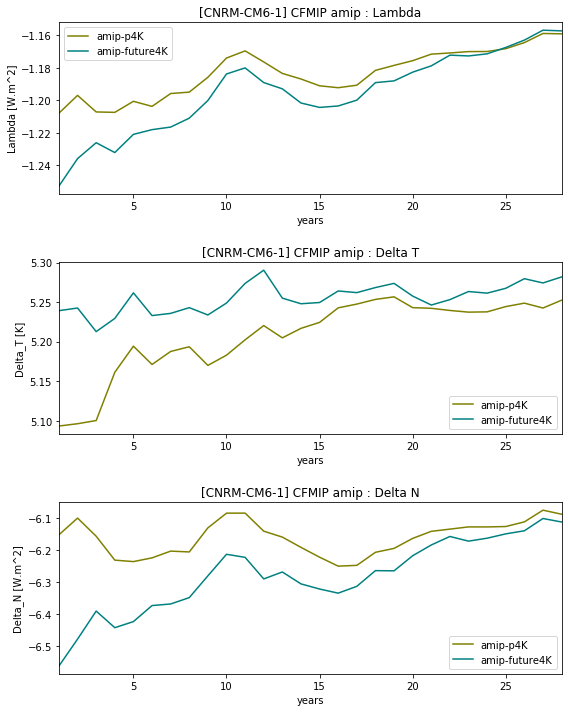

In [78]:
#--------------------------- Plot result : 4xCO2 --------------------------------------
plt.subplots(figsize=(8,10))

plt.subplot(311)
ax2=plt.gca()
result.plot(y='Lambda_amip4xCO2',kind='line',title='[CNRM-CM6-1] CFMIP amip : Lambda',legend=True, color='green',ax=ax2)
result.plot(y='Lambda_sst',kind='line',legend=True, color='blue',ax=ax2)
ax2.axhline(y=Lamip, xmin=0, xmax=36, ls='--', color='grey')
ax2.axhline(y=Lsst, xmin=0, xmax=36, ls='--', color='grey')
ax2.set_xlabel('years')
ax2.set_ylabel('Lambda [W.m^2]')
ax2.legend(['amip-4xCO2','piSST-4xCO2'])
ax2.set_ylim([6,10])
ax2.set_xlim([1,28])

plt.subplot(312)
ax3=plt.gca()
result.plot(y='Delta_tas_amip4xCO2',kind='line',title='[CNRM-CM6-1] CFMIP amip : Delta T',legend=True, color='green',ax=ax3)
result.plot(y='Delta_tas_sst',kind='line',legend=True, color='blue',ax=ax3)
ax3.set_xlabel('years')
ax3.set_ylabel('Delta_T [K]')
ax3.legend(['amip-4xCO2','piSST-4xCO2'])
ax3.set_ylim([0,3])
ax3.set_xlim([1,28])

plt.subplot(313)
ax4=plt.gca()
result.plot(y='Delta_N_amip4xCO2',kind='line',color='green',title='[CNRM-CM6-1] CFMIP amip : Delta N',legend=True,ax=ax4)
result.plot(y='Delta_N_sst',kind='line',color='blue',legend=True,ax=ax4)
ax4.set_xlabel('years')
ax4.set_ylabel('Delta_N [W.m^2]')
ax4.legend(['amip-4xCO2','piSST-4xCO2'])
ax4.set_ylim([6.5,9.5])
ax4.set_xlim([1,28])

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.40)


#--------------------------- Plot result : p4K and future4K --------------------------------------
plt.subplots(figsize=(8,10))

plt.subplot(311)
ax2=plt.gca()
result.plot(y='Lambda_amip4K',kind='line',title='[CNRM-CM6-1] CFMIP amip : Lambda',legend=True, color='olive',ax=ax2)
result.plot(y='Lambda_amipfuture4K',kind='line',legend=True, color='teal',ax=ax2)
#ax2.axhline(y=Lamip4K, xmin=0, xmax=36, ls='--', color='grey')
#ax2.axhline(y=Lamipfuture4K, xmin=0, xmax=36, ls='--', color='grey')
ax2.set_xlabel('years')
ax2.set_ylabel('Lambda [W.m^2]')
ax2.legend(['amip-p4K','amip-future4K'])
#ax2.set_ylim([6,10])
ax2.set_xlim([1,28])

plt.subplot(312)
ax3=plt.gca()
result.plot(y='Delta_tas_amip4K',kind='line',title='[CNRM-CM6-1] CFMIP amip : Delta T',legend=True, color='olive',ax=ax3)
result.plot(y='Delta_tas_amipfuture4K',kind='line',legend=True, color='teal',ax=ax3)
ax3.set_xlabel('years')
ax3.set_ylabel('Delta_T [K]')
ax3.legend(['amip-p4K','amip-future4K'])
#ax3.set_ylim([0,3])
ax3.set_xlim([1,28])

plt.subplot(313)
ax4=plt.gca()
result.plot(y='Delta_N_amip4K',kind='line',color='olive',title='[CNRM-CM6-1] CFMIP amip : Delta N',legend=True,ax=ax4)
result.plot(y='Delta_N_amipfuture4K',kind='line',color='teal',legend=True,ax=ax4)
ax4.set_xlabel('years')
ax4.set_ylabel('Delta_N [W.m^2]')
ax4.legend(['amip-p4K','amip-future4K'])
#ax4.set_ylim([6.5,9.5])
ax4.set_xlim([1,28])

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.40)

